# Text Summarization 

Text Summarization is method of extracting summary from the text file. These are the following steps 
used in text summarization - 
    1. Importing the required packages into python
    2. Reading the pdf or text file with the help of PyPDF2 package
    3. Tokenizing the document with the help of nltk packages i.e splitting the documents into sentences, this will later      
       help us to store the data in structured format using pandas
    4. Text cleaning - this step includes converting the sentences in the data frame format for easier processing of the 
       data.Text cleaning includes removing punctuations, numbers,text chracters, stop words (common words), words whose 
       length is less than 3 etc. 
    5. Generating term document frequency matrix data with the help of nltk package
    6. TextRank Algorithm using networx package
    7. Finding the important sentences based on rank and creating summary
    8. Exporting the summary 


### 1. Importing the required libraries for text summarization

In [255]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2. Function to read the document from user

In [256]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.pdf'):
        choice = 1
    else:
        choice = 2
    print(choice)

    # Case 1: .pdf file
    if choice == 1:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        number_of_pages = pdfReader.getNumPages()
        document =''
        for i in range(number_of_pages):
            pageObj = pdfReader.getPage(i)
            document = document + pageObj.extractText()
        pdfFileObj.close()
    
    # Case 2: none of the format
    elif choice == 2:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [503]:
document = readDoc()

Please input a file name: RFP_One.pdf
You have asked for the document RFP_One.pdf
1
<class 'str'>


###    3. Tokenizing the document into sentences

In [504]:
def tokenize(document): 
    doc_tokenizer = PunktSentenceTokenizer() 
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [505]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 3984
The size of the item 0 in Bytes is: 293


In [506]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 431


###    4. Text cleaning 

In [507]:
df = pd.DataFrame(sentences_list,columns = ['Sentence'])

#### Removing the punctuations, numbers and special characters and creating tidy sentence columns 

In [509]:
df['Sentence']  = df['Sentence'].str.replace("˙E ˙C˙¢˙Ł˝y", " ") 
df['Sentence']  = df['Sentence'].str.replace("E C y A", " ") 
df['Sentence']  = df['Sentence'].str.replace(r" ?\([^)]+\)", " ") 
df['Sentence']  = df['Sentence'].str.replace("[˝,_]", " ") 
df['Sentence']  = df['Sentence'].str.replace("[^a-zA-Z#]", " ") 

#### Removing uneccesary white spaces and new line characters from the sentences

In [510]:
df['Sentence'] = df['Sentence'].apply(lambda x: x.replace('\n',' '))
df.Sentence = df.Sentence.str.replace('\s+', ' ', regex=True)

#### Removing short words whose length is less that 3

In [511]:
df['tidy_sentence'] = df['Sentence'].apply(lambda x : ' '.join([w for w in x.split() if len(w)>3]))

#### Removing stop words( common words like it, above etc.) from the tide_sentence column 

In [512]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop = stopwords.words('english')

tokenized_sentence = df['tidy_sentence'].apply(lambda x : x.split())
tokenized_sentence = tokenized_sentence.apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [513]:
tokenized_sentence = tokenized_sentence.apply(lambda x:' '.join(x))
df['tidy_sentence'] = tokenized_sentence

#### Removing sentences with words less than ten 

In [514]:
df ['No_of_Words'] = df['Sentence'].str.split(" ").apply(len)
df.drop(df[df ['No_of_Words'] < 10].index,inplace = True)

### 5. Understanding the distribution of the sequences

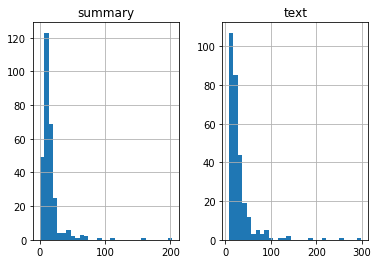

In [515]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Sentence']:
      text_word_count.append(len(i.split()))

for i in df['tidy_sentence']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [516]:
min_num_words = 20
max_num_words = 100

### 5. Generating term document matrix of the data

In [517]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['tidy_sentence'])

In [518]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <292x1480 sparse matrix of type '<class 'numpy.int64'>'
	with 4089 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['abide', 'ability', 'above', 'absolute', 'accept', 'acceptan', 'acceptance', 'accepted', 'access', 'accessed', 'accompanying', 'accordance', 'account', 'accuracy', 'acknowledged', 'acknowledges', 'acoity', 'acquisition', 'across', 'action', 'activities', 'activity', 'acts', 'actual', 'addenda', 'addition', 'additional', 'additionally', 'address', 'addressed', 'addresses', 'addressing', 'adhering', 'adjudication', 'adjuster', 'administrative', 'advancement', 'adverse', 'advice', 'advised', 'advisors', 'advisory', 'affect', 'affecting', 'affiliates', 'affixed', 'aforesaid', 'agencies', 'agency', 'agent', 'agents', 'aggregate', 'agree', 'agreed', 'agreement', 'alleged', 'allegedly', 'allocated', 'along', 'also', 'alteration', '

In [519]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [520]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <1480x292 sparse matrix of type '<class 'numpy.float64'>'
	with 4089 stored elements in Compressed Sparse Column format>>


### 6. TextRank Algorithm

The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead. [nx_pylab.py:579]


Number of edges 11220
Number of vertices 292


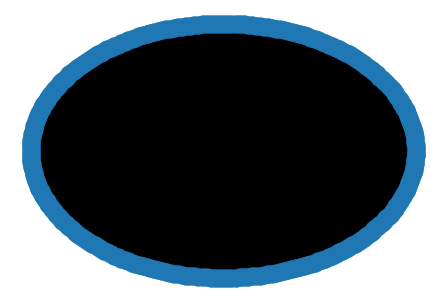

The memory used by the graph in Bytes is: 56


In [521]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [522]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 9320
0 0.005578169771396853
1 0.002557105780091448
2 0.005352724314026352
3 0.0027048645223947624
4 0.0037986787417160525
5 0.003904490083385877
6 0.002494019928508782
7 0.0017377413874040926
8 0.0032074078585330374
9 0.004559773115041601
10 0.005217409370965713
11 0.0044328441463183
12 0.004559773115041601
13 0.005545889662978221
14 0.002959294936899654
15 0.005455929880811951
16 0.0029240933859165617
17 0.0031998123702229177
18 0.003762309156600641
19 0.0027196506208346273
20 0.0024703323050109193
21 0.003850446376257129
22 0.002191959436394632
23 0.004006240827100249
24 0.004154527612246742
25 0.0038061456659480505
26 0.004137854370380604
27 0.0028978351850901755
28 0.004103305728989188
29 0.0031139223665368554
30 0.004290122371878404
31 0.004005398774752413
32 0.0041145428641479595
33 0.003124267844567309
34 0.0023679125110067367
35 0.002583062016207192
36 0.004411173688164701
37 0.0026632089393610198
38 0.0036764697715940

### 7. Finding important sentences and generating summary

In [523]:
df['Ranks'] = ranks
df = df.sort_values(by = 'Ranks',ascending = False)

##### Creating Normalized Rank

In [524]:
df['Normalized_Rank'] =(df['Ranks']-df['Ranks'].min())/(df['Ranks'].max()-df['Ranks'].min())

In [533]:
df_final = df[df['No_of_Words'] < max_num_words]
df_final = df_final[df_final['No_of_Words'] > min_num_words]

In [526]:
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = df['Normalized_Rank'].mean() + 0.35
threshold

0.8500000000000002

In [527]:
df_final = df_final[df_final['Normalized_Rank'] > threshold]
df_final

,Sentence,tidy_sentence,No_of_Words,Ranks,Normalized_Rank
430,Premiums quoted above should be valid for a p...,Premiums quoted valid period year inclusive ti...,24,291,1.000000
428,However the Power of Attorney provided by Appl...,However Power Attorney provided Applicants cou...,35,290,0.996564
425,IN WITNESS WHEREOF WE THE ABOVE NAMED PRINCIPA...,WITNESS WHEREOF ABOVE NAMED PRINCIPAL HAVE EXE...,29,288,0.989691
424,AND we hereby agree to ratify and confirm and ...,hereby agree ratify confirm hereby ratify conf...,76,287,0.986254
421,We hereby undertake and confirm that we have ...,hereby undertake confirm understood scope work...,24,284,0.975945
420,We certify that neither our firm nor any of t...,certify neither firm partners directors involv...,27,283,0.972509
416,Dear Sir I on behalf of T here is no case with...,Dear behalf case Police Court IRDA SEBI Regula...,28,280,0.962199
414,Page # Point Section # Query Banks Response Da...,Page Point Section Query Banks Response Date A...,23,278,0.955326
412,Page # Point Section # Clarification point as ...,Page Point Section Clarification point stated ...,24,277,0.951890
410,Date Authorized Signatory Annexure V Comments ...,Date Authorized Signatory Annexure Comments Te...,32,276,0.948454


In [528]:
summary = df_final['Sentence']

In [530]:
summ = ''
for i in summary:
    summ = summ + str(i)+". "


In [531]:
summ

' Premiums quoted above should be valid for a period of year and inclusive of s tipulated IRDA I brokerage on insurance policies . However the Power of Attorney provided by Applicants from countries that have signed the Hague Legislation Convention are not required to be legalized by the Indian Embassy if it carries a conforming Appostille certificate . IN WITNESS WHEREOF WE THE ABOVE NAMED PRINCIPAL HAVE EXECUTED THIS POWER OF ATTORNEY ON Y OF For Authorized Signature Authorized Signatory Name Title of Signatory Address Witnesses . AND we hereby agree to ratify and confirm and do hereby ratify and confirm all acts deeds and things done or caused to be done by our said Attorney pursuant to and in exercise of the powers conferred by this Power of Attorney and that all acts d eeds and things done by our said Attorney in exercise of the powers hereby conferred shall and shall always be deemed to have been done by us .  We hereby undertake and confirm that we have understood the scope of w

In [532]:
text_file = open("RFP_One_summary.txt", "wt")
n = text_file.write(str(summ))
text_file.close()